### <center>Friesky Astria Dewi Lestari</center>
#### <center>F1D022045</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

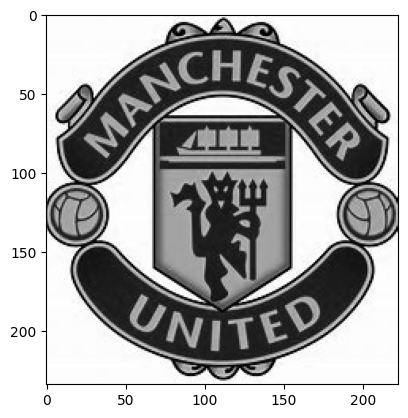

In [2]:
image = plt.imread('./assets/manchester_united.jpeg')
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap ="gray")

In [3]:
def getPadding (image, kernel):
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j
    
    result = np.pad(image,(atas,bawah,(kiri,kanan)), 'edge')
    return result

In [4]:
def konvolusi (image, kernel):
    result = np.zeros(image.shape).astype(int)
    imgPad = getPadding(image, kernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += imgPad[i+k][j+l] * kernel[k, l]
                result[i, j] = sum
    return result

In [5]:
def meanFilter (image, lebarKernel, tinggiKernel):
    kernel = np.full((lebarKernel, tinggiKernel), 1/(lebarKernel*tinggiKernel))
    result = konvolusi(image, kernel)
    return result